## initializations

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
seed=42
import torch
torch.manual_seed(seed)
import numpy as np
np.random.seed(seed+1)

In [3]:
from __future__ import print_function, division
import os
print('torch version:',torch.__version__)
import sklearn
print('sklearn version:', sklearn.__version__)

torch version: 1.3.1
sklearn version: 0.22.1


In [4]:
import torchvision
import torch.nn.functional as F
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import time
import os
import copy

In [5]:
t=torch.Tensor()
device = t.device
device

device(type='cpu')

In [6]:
# if torch.cuda.is_available():
#     device=torch.device("cuda:0")
    
# print(model)

## starting the main code

In [7]:
training_set=0
validation_set=0
path='../L100'
transform=torchvision.transforms.ToTensor()

whole_dataset=torchvision.datasets.ImageFolder(root=path,
                                                   transform=transform)


In [8]:
data_size = len(whole_dataset)
validation_split=0.1
split=int(np.floor(validation_split*data_size))
training=int(data_size-split)
#split the data into training and validation
training_set, validation_set= torch.utils.data.random_split(whole_dataset,(training,split))
#Load data into batches 
train=torch.utils.data.DataLoader(training_set,batch_size=16,
                                          shuffle=True)

val=torch.utils.data.DataLoader(validation_set,batch_size=16 )

In [9]:
class_names =whole_dataset.classes
class_names

['p0.1',
 'p0.2',
 'p0.3',
 'p0.4',
 'p0.5',
 'p0.55',
 'p0.56',
 'p0.57',
 'p0.58',
 'p0.59',
 'p0.5927',
 'p0.6',
 'p0.61',
 'p0.62',
 'p0.63',
 'p0.64',
 'p0.65',
 'p0.7',
 'p0.8',
 'p0.9']

In [10]:
batch_size=16
num_of_train_samples = len(training_set) # total training samples
num_of_test_samples = len(validation_set) #total validation samples
steps_per_epoch = np.ceil(num_of_train_samples // batch_size)
number_classes = len(class_names)
print(num_of_train_samples)
print(num_of_test_samples )
print(len(train)) 
print(len(val))
print(number_classes )

18000
2000
1125
125
20


## building the CNN

In [11]:
class Network(nn.Module):   
    def __init__(self):
        super(Network, self).__init__()
        # Defining a 2D convolution layer
        self.conv1=nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, stride=1, padding=0, bias=False)
        self.conv2=nn.Conv2d(in_channels=16, out_channels=16, kernel_size=5, stride=1, padding=1, bias=False)
       
            
        # Defining another 2D convolution layer
        self.conv3=nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=0, bias=False)
        self.conv4=nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1, bias=False)
            
            
        self.conv5=nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=0, bias=False)
        self.conv6=nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1, bias=False)
                  
        self.fc1=nn.Linear(in_features=6400, out_features=64,bias=False) 
        self.fc2=nn.Linear(in_features=64,out_features=number_classes,bias=False)
        

    # Defining the forward pass    
    def forward(self, x):
        x = self.conv1(x)
        x=F.relu(x)
        x = self.conv2(x)
        x=F.relu(x)
        x=F.max_pool2d(x,kernel_size=2, stride=2)
        x=F.dropout(x,p=0.5)
        
        
        
        x = self.conv3(x)
        x=F.relu(x)
        x = self.conv4(x)
        x=F.relu(x)
        x=F.max_pool2d(x,kernel_size=2, stride=2)
        x=F.dropout(x,p=0.5)
        
        
        
        x = self.conv5(x)
        x=F.relu(x)
        x = self.conv6(x)
        x=F.relu(x)
        x=F.max_pool2d(x,kernel_size=2, stride=2)
        x=F.dropout(x,p=0.5)
        
        #Beginning of dense layers
        x = x.view(x.size(0), -1) #flatten the network
        x=self.fc1(x)
        x=self.fc2(x)    
        
    
        return x

In [12]:
model=Network()
PATH = './test.pth'
model.load_state_dict(torch.load(PATH))


<All keys matched successfully>

## testing the quality of the learned model

In [13]:
os.getcwd()

'/home/phrhmb/Desktop/Torch'

In [14]:
from function_torch import *
cm=simple_confusion_matrix(model,val,number_classes)
cm

tensor([[ 6.,  0.,  8.,  1.,  4.,  0., 27.,  1., 21.,  1.,  5.,  4.,  5.,  0.,
          9.,  0., 15.,  0.,  5.,  0.],
        [ 8.,  1., 12.,  0.,  0.,  0., 19.,  2., 24.,  2., 11.,  4.,  3.,  0.,
         13.,  2., 11.,  0.,  2.,  0.],
        [ 9.,  0., 17.,  2.,  1.,  1., 18.,  3., 14.,  1.,  3.,  2.,  5.,  0.,
          6.,  2.,  9.,  0.,  7.,  0.],
        [ 6.,  1.,  8.,  2.,  0.,  0., 18.,  2., 18.,  0.,  6.,  1.,  4.,  1.,
          7.,  1., 11.,  0.,  7.,  0.],
        [ 8.,  1.,  9.,  2.,  2.,  1., 22.,  1., 16.,  1.,  9.,  3.,  3.,  0.,
          8.,  4., 20.,  0.,  3.,  0.],
        [ 6.,  0., 11.,  0.,  2.,  1., 24.,  0., 14.,  1.,  4.,  0.,  5.,  0.,
          6.,  2., 18.,  0.,  3.,  0.],
        [ 5.,  1.,  8.,  4.,  2.,  1., 18.,  3., 21.,  1.,  8.,  0.,  7.,  2.,
          9.,  1.,  4.,  0., 11.,  0.],
        [ 4.,  1.,  9.,  2.,  1.,  0., 31.,  2., 23.,  2.,  6.,  1.,  4.,  2.,
          2.,  2., 12.,  0.,  1.,  0.],
        [10.,  0.,  5.,  1.,  1.,  0., 20.,  2.,

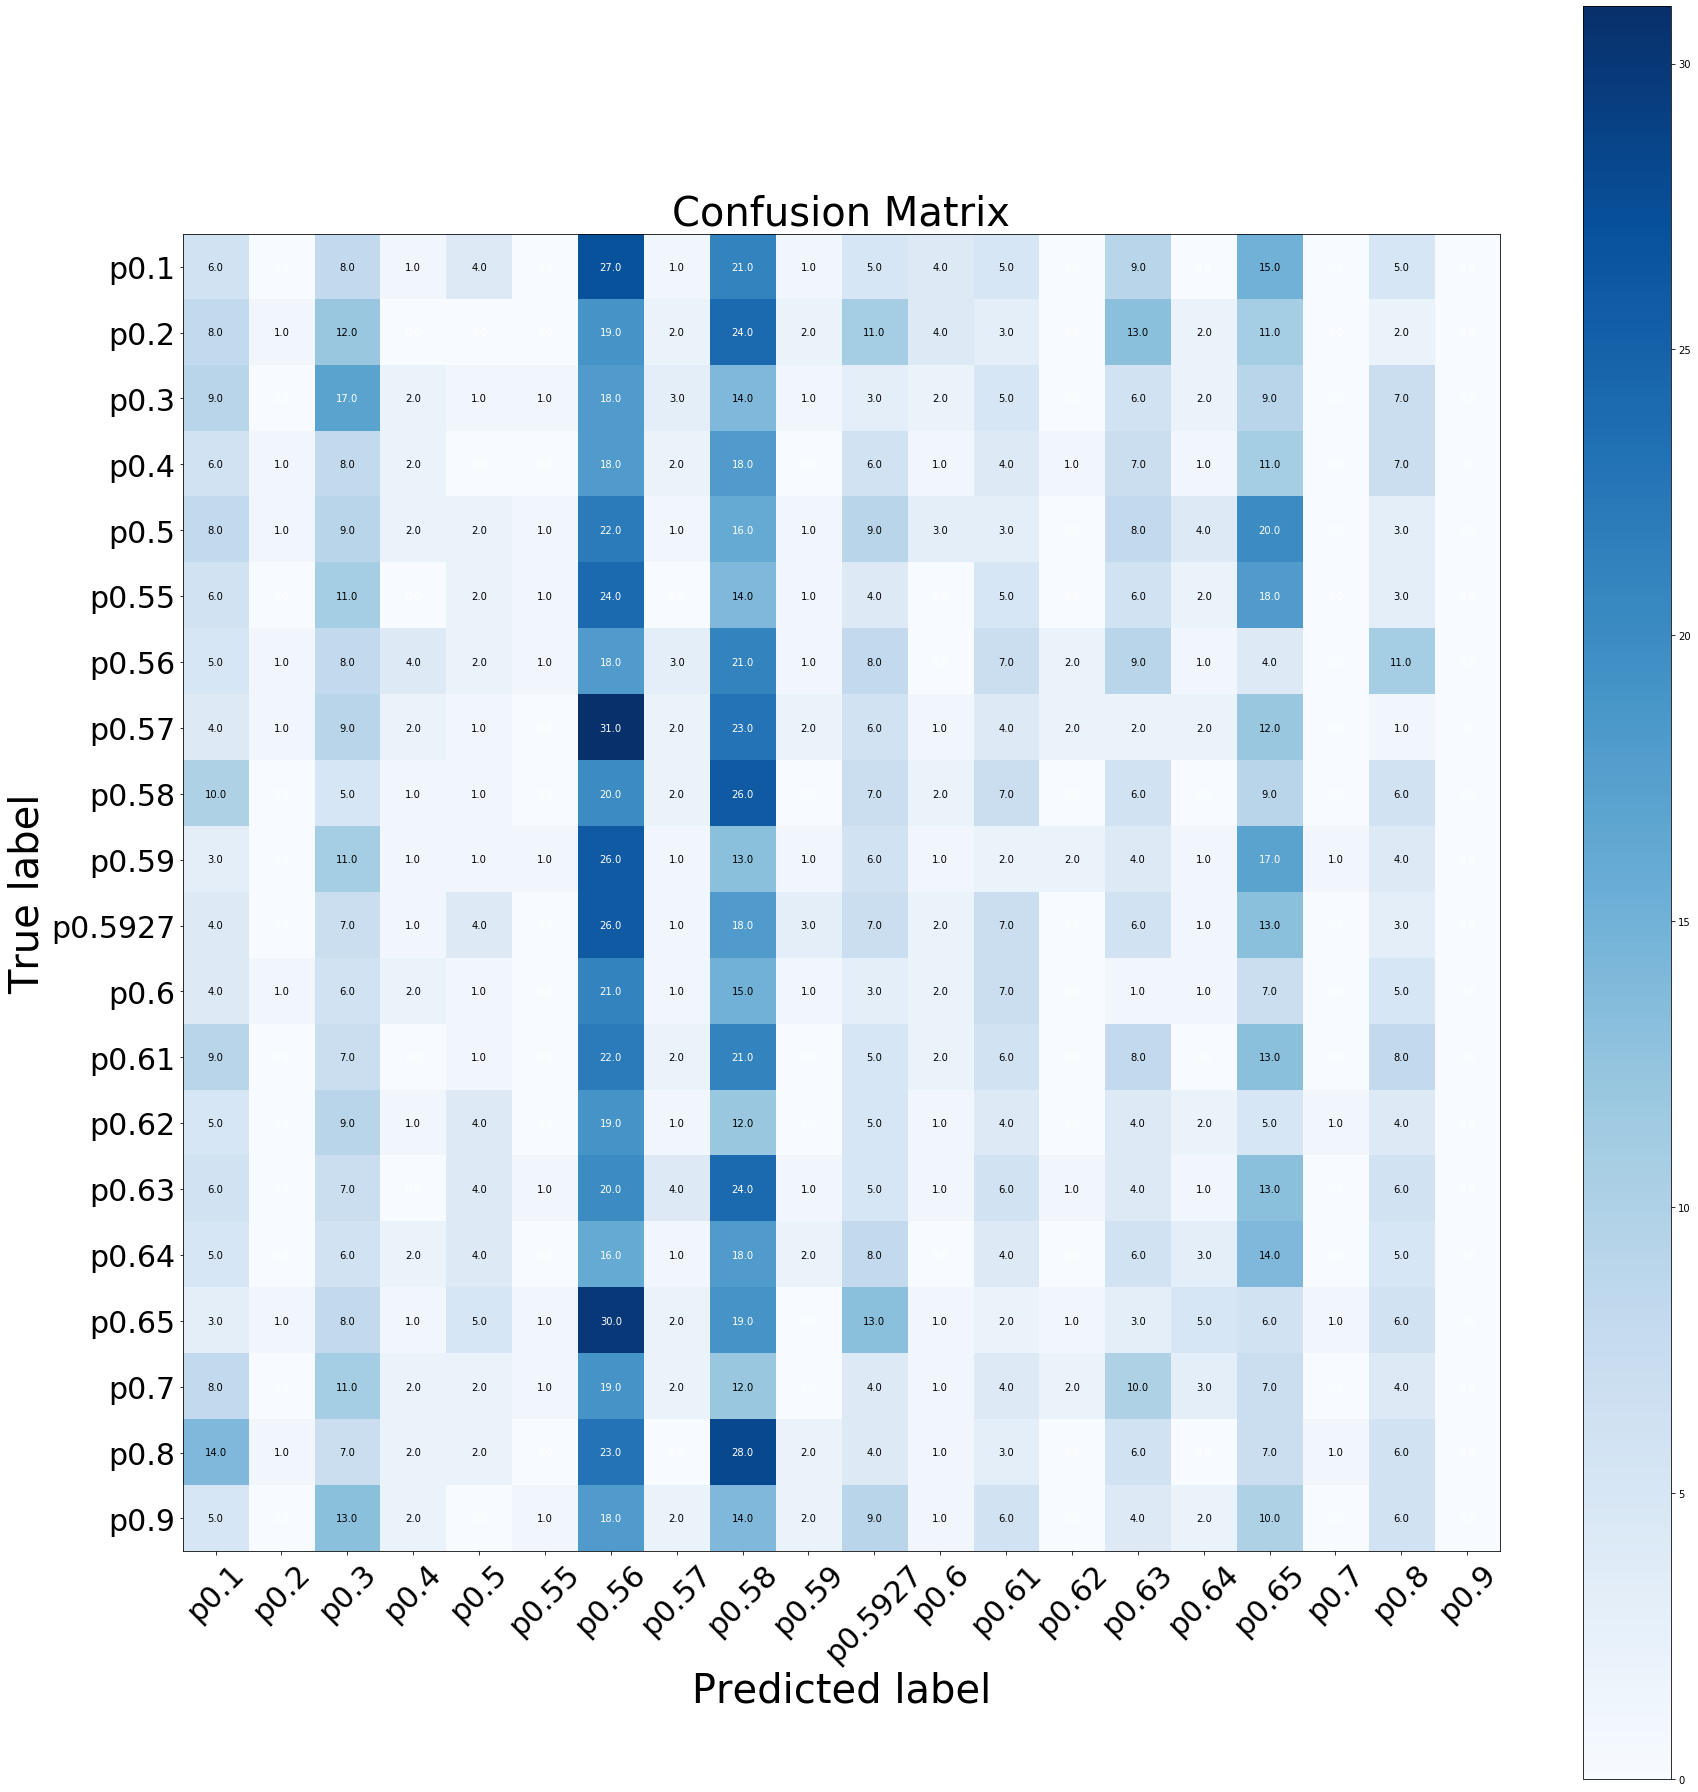

In [15]:
confusion_matrix_torch(cm,class_names)

## Hyperparameter tunning

In [16]:
import torch.optim
from itertools import product 

In [17]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    
    
print(device)


cuda:0


In [18]:
def train_model(model,criterion, optimizer, num_epochs, scheduler, batch_size):
    since=time.time()
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    

    
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch,num_epochs-1))
        print('-' * 10)
        
    #two phases training and validating
        for phase in [train,val]:
            if phase == train:
                model.train()# set the model to training mode
            else:
                model.eval() 
                
            running_loss=0.0
            running_corrects=0.0
            
            # Here's where the training happens
            print('Iterating through data...')
            
            for i, (inputs, labels) in enumerate(phase):
                inputs=inputs.to(device)
                labels=labels.to(device)
                
                
                #put the gradient to zero to avoid accumulation during back propagation
                optimizer.zero_grad()
                
                
                #now we need to carry out the forward and backward process in different steps
                #First the forward training
                #for the training step we need to log the loss
                with torch.set_grad_enabled(phase==train):
                    outputs=model(inputs)
                    _, preds= torch.max(outputs,1)
                    loss=criterion(outputs,labels)
                
                #still for the training phase we need to implement backword process and optimization
                
                    if phase==train:
                        loss.backward()
                        optimizer.step()
                        
                # We want variables to hold the loss statistics
                #loss.item() extract the loss value as float then it is multiply by the batch size
                running_loss+=loss.item()*inputs.size(0)
                running_corrects+= torch.sum(preds==labels.data)
                
            if phase == train:
                scheduler.step()

                
            
            if phase ==train:
                epoch_loss= running_loss/len(phase.dataset)
                epoch_acc = running_corrects.double()/ len(phase.dataset)
                print('{} loss: {:4f} accuracy: {:4f}'.format(
                'training', epoch_loss, epoch_acc
            ))
                
            
            if phase==val:
                epoch_loss= running_loss/len(val.dataset)
                epoch_acc = running_corrects.double()/len(val.dataset)
                print('{} val_loss: {:4f} val_accuracy: {:4f}'.format(
            'validation:', epoch_loss, epoch_acc
            ))
            # Make a copy of the model if the accuracy on the validation set has improved
            if phase == val and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # Now we'll load in the best model weights and return it
    model.load_state_dict(best_model_wts)
    return model

                    
        

In [19]:
def optimizer_choice(optimizer,model,criterion):
    #accuracy=np.zeros(len(optimizer))
    for opt in optimizer:
        torch.manual_seed(seed)
        model=Network()
        criterion = nn.CrossEntropyLoss()
        print('Optimizer:', opt)
        if torch.cuda.is_available():
            model = model.cuda()
            criterion = criterion.cuda()


        exp_lr_scheduler = lr_scheduler.StepLR(opt, step_size=7, gamma=0.1)
        train_model(model, criterion, opt,1,exp_lr_scheduler,batch_size=16)
        
        print('-------------------')
        


            

In [20]:
lr=0.001
optimizer=[torch.optim.Adadelta(model.parameters(), lr=1.0, rho=0.9, eps=1e-06, weight_decay=0)
           , torch.optim.Adam(model.parameters(),lr=lr)
           , torch.optim.SGD(model.parameters(),lr=lr),  
           torch.optim.Adagrad(model.parameters(),lr=lr)]
learning_rate=[0.1, 0.001, 0.0001]
criterion = nn.CrossEntropyLoss()




In [21]:
optimizer_choice(optimizer,model,criterion)

Optimizer: Adadelta (
Parameter Group 0
    eps: 1e-06
    lr: 1.0
    rho: 0.9
    weight_decay: 0
)
Epoch 0/0
----------
Iterating through data...
training loss: 2.995652 accuracy: 0.050667
Iterating through data...
validation: val_loss: 2.995841 val_accuracy: 0.049500

Training complete in 0m 14s
Best val Acc: 0.049500
-------------------
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)
Epoch 0/0
----------
Iterating through data...
training loss: 2.995652 accuracy: 0.050667
Iterating through data...
validation: val_loss: 2.995841 val_accuracy: 0.049500

Training complete in 0m 13s
Best val Acc: 0.049500
-------------------
Optimizer: SGD (
Parameter Group 0
    dampening: 0
    lr: 0.001
    momentum: 0
    nesterov: False
    weight_decay: 0
)
Epoch 0/0
----------
Iterating through data...
training loss: 2.995652 accuracy: 0.050667
Iterating through data...
validation: val_loss: 2.995841 val_accuracy: